# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Haekhal Moch Dhia Ulhaq
- **Email:** b25b9d024@student.devacademy.id
- **ID Dicoding:** b25b9d024

## Menentukan Pertanyaan Bisnis

- Bagaimana permintaan rental sepeda pada 2011 sampai 2012 ?
- Pada hari dan jam berapa pengguna paling sering menggunakan jasa rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [468]:
#mengimport libray yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [469]:
# Memuat data hari
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [470]:
# Memuat dataframe ja 
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada dataframe diatas bisa kita lihat bahwa pengguna terbagi menjadi 2 yaitu casual dan registered.
- Pada data diatas kita bisa menentukan seberapa banyak pengguna pada waktu tertentu.
- kita juga bisa mendapatkan informasi total pengguna, rata-rata pengguna harian dan pengguna harian tertinggi pada periode tersebut.
- Pada kedua data tersebut kita bisa mendapatkan pola hari dan jam berapa pengguna paling sering menggunakan jasa rental sepeda.
- Pada kedua data tersebut terdapat kolom season atau musim.

### Assessing Data

In [471]:
# Menampilkan informasi struktur DataFrame day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [472]:
# Menampilkan informasi struktur DataFrame hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [473]:
# Melihat jumlah nilai kosong pada day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [474]:
# Melihat jumlah nilai kosong pada hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [475]:
# Menampilkan ringkasan dari data day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [476]:
# Menampilkan ringkasan dari data hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [477]:
# Deteksi data ganda (duplikat) dalam dataset harian dan jam
print("Jumlah Duplikat pada dataframe day_df :",day_df.duplicated().sum())
print("Jumlah Duplikat pada dataframe hour_df : ",hour_df.duplicated().sum())

Jumlah Duplikat pada dataframe day_df : 0
Jumlah Duplikat pada dataframe hour_df :  0


**Insight:**
- Pada dataframe day_df dan hour_df terdapat kolom dteday dengan tipe data object seharusnya kolum tersebut bertipe data datetime.
- Pada dataframe day_df dan hour_df tidak terdapat missing value atau nilai kosong.
- Pada dataframe day_df dan hour_df kita mendapatkan informasi nilai statistik berupa count, mean, std, min, Q1 , median, Q2 dan max
- Pada dataframe day_df dan hour_df tidak terdapat data duplikat.

### Cleaning Data

In [478]:
#Merubah tipe data pada kolom dteday dari object menjadi tipe data datetime
datetime_column = ['dteday']
for column in datetime_column:
    day_df[column]= pd.to_datetime(day_df[column])
    hour_df[column]=pd.to_datetime(hour_df[column])

In [479]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [480]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data pada kolom dtday yang tadinya berupa tipe data object sudah berubah menjadi tipe data datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [481]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [482]:
# Mapping nilai weekday
day_names = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}

# Menambahkan kolom hari
day_df['hari'] = day_df['weekday'].map(day_names)

# Group by berdasarkan hari untuk menghitung total pengguna casual dan registered
grouped_hari_sum = (
    day_df.groupby('hari')[['casual', 'registered','cnt']]
    .sum()
    .reindex(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
)

print(grouped_hari_sum)

        casual  registered     cnt
hari                              
Senin    70784      384719  455503
Selasa   57843      411266  469109
Rabu     57319      415729  473048
Kamis    61460      423935  485395
Jumat    78238      409552  487790
Sabtu   153852      323955  477807
Minggu  140521      303506  444027


In [483]:
print(grouped_hari_sum.sort_values(by='cnt',ascending=False))

        casual  registered     cnt
hari                              
Jumat    78238      409552  487790
Kamis    61460      423935  485395
Sabtu   153852      323955  477807
Rabu     57319      415729  473048
Selasa   57843      411266  469109
Senin    70784      384719  455503
Minggu  140521      303506  444027


In [484]:
# Group by berdasarkan hari untuk menghitung rata-rata pengguna casual dan registered
grouped_hari_mean= (
    day_df.groupby('hari')[['casual', 'registered']]
    .mean()
    .reindex(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
)

print(grouped_hari_mean)

             casual   registered
hari                            
Senin    674.133333  3663.990476
Selasa   556.182692  3954.480769
Rabu     551.144231  3997.394231
Kamis    590.961538  4076.298077
Jumat    752.288462  3938.000000
Sabtu   1465.257143  3085.285714
Minggu  1338.295238  2890.533333


In [485]:
# Mapping nilai season
season_names = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Menambahkan kolom musim
day_df['musim'] = day_df['season'].map(season_names)

# Group by berdasarkan musim untuk menghitung rata-rata pengguna
grouped_musim_day_sum = (
    day_df.groupby('musim')[['casual', 'registered','cnt']]
    .sum()
    .reindex(['Spring', 'Summer', 'Fall', 'Winter'])
)

print(grouped_musim_day_sum)

        casual  registered      cnt
musim                              
Spring   60622      410726   471348
Summer  203522      715067   918589
Fall    226091      835038  1061129
Winter  129782      711831   841613


In [486]:
print(grouped_musim_day_sum.sort_values(by='cnt', ascending=False))

        casual  registered      cnt
musim                              
Fall    226091      835038  1061129
Summer  203522      715067   918589
Winter  129782      711831   841613
Spring   60622      410726   471348


In [487]:
# Group by berdasarkan musim untuk menghitung rata-rata pengguna
grouped_musim_day_mean = (
    day_df.groupby('musim')[['casual', 'registered']]
    .mean()
    .reindex(['Spring', 'Summer', 'Fall', 'Winter'])
)

print(grouped_musim_day_mean)

             casual   registered
musim                           
Spring   334.928177  2269.204420
Summer  1106.097826  3886.233696
Fall    1202.611702  4441.691489
Winter   729.112360  3999.050562


In [488]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [489]:
# Menambahkan kolom jam dan merubah formatnya
hour_df['jam'] = hour_df['hr'].apply(lambda x: f"{x:02d}:00")

# Group by berdasarkan jam untuk menghitung total pengguna casual, registered dan total pengguna
grouped_jam_sum = (
    hour_df.groupby('jam')[['casual', 'registered', 'cnt']]
    .sum()
    .reindex([f"{i:02d}:00" for i in range(24)]) 
)

print(grouped_jam_sum)

       casual  registered     cnt
jam                              
00:00    7375       31755   39130
01:00    4709       19455   24164
02:00    3412       12940   16352
03:00    1893        6281    8174
04:00     874        3554    4428
05:00    1012       13249   14261
06:00    3017       52115   55132
07:00    8037      146134  154171
08:00   15761      245240  261001
09:00   22458      136980  159438
10:00   33789       92468  126257
11:00   43286      108034  151320
12:00   49718      134696  184414
13:00   52713      132206  184919
14:00   55089      120563  175652
15:00   54606      128543  183149
16:00   53834      173914  227748
17:00   54220      282640  336860
18:00   44496      265276  309772
19:00   35505      191284  226789
20:00   26378      138172  164550
21:00   20570      104875  125445
22:00   16200       79412   95612
23:00   11065       52876   63941


In [490]:
print(grouped_jam_sum.sort_values(by=('cnt'), ascending=False))

       casual  registered     cnt
jam                              
17:00   54220      282640  336860
18:00   44496      265276  309772
08:00   15761      245240  261001
16:00   53834      173914  227748
19:00   35505      191284  226789
13:00   52713      132206  184919
12:00   49718      134696  184414
15:00   54606      128543  183149
14:00   55089      120563  175652
20:00   26378      138172  164550
09:00   22458      136980  159438
07:00    8037      146134  154171
11:00   43286      108034  151320
10:00   33789       92468  126257
21:00   20570      104875  125445
22:00   16200       79412   95612
23:00   11065       52876   63941
06:00    3017       52115   55132
00:00    7375       31755   39130
01:00    4709       19455   24164
02:00    3412       12940   16352
05:00    1012       13249   14261
03:00    1893        6281    8174
04:00     874        3554    4428


In [491]:
# Group by berdasarkan jam untuk menghitung rata-rata pengguna casual, registered dan total pengguna
grouped_jam_mean = (
    hour_df.groupby('jam')[['casual', 'registered', 'cnt']]
    .mean()
    .reindex([f"{i:02d}:00" for i in range(24)]) 
)

print(grouped_jam_mean)

          casual  registered         cnt
jam                                     
00:00  10.158402   43.739669   53.898072
01:00   6.504144   26.871547   33.375691
02:00   4.772028   18.097902   22.869930
03:00   2.715925    9.011478   11.727403
04:00   1.253945    5.098996    6.352941
05:00   1.411437   18.478382   19.889819
06:00   4.161379   71.882759   76.044138
07:00  11.055021  201.009629  212.064649
08:00  21.679505  337.331499  359.011004
09:00  30.891334  188.418157  219.309491
10:00  46.477304  127.191197  173.668501
11:00  59.540578  148.602476  208.143054
12:00  68.293956  185.021978  253.315934
13:00  72.308642  181.352538  253.661180
14:00  75.567901  165.381344  240.949246
15:00  74.905350  176.327846  251.233196
16:00  73.745205  238.238356  311.983562
17:00  74.273973  387.178082  461.452055
18:00  61.120879  364.390110  425.510989
19:00  48.770604  262.752747  311.523352
20:00  36.233516  189.796703  226.030220
21:00  28.255495  144.059066  172.314560
22:00  22.252747

In [492]:
# Menambahkan kolom musim pada hour_df
hour_df['musim'] = hour_df['season'].map(season_names)

# Group by berdasarkan musim untuk menghitung total pengguna 
grouped_musim_hour_sum= (
    hour_df.groupby('musim')[['casual', 'registered', 'cnt']]
    .sum()
    .reindex(['Spring', 'Summer', 'Fall', 'Winter'])
)

print(grouped_musim_hour_sum)

        casual  registered      cnt
musim                              
Spring   60622      410726   471348
Summer  203522      715067   918589
Fall    226091      835038  1061129
Winter  129782      711831   841613


In [493]:
print(grouped_musim_hour_sum.sort_values(by='cnt', ascending=False))

        casual  registered      cnt
musim                              
Fall    226091      835038  1061129
Summer  203522      715067   918589
Winter  129782      711831   841613
Spring   60622      410726   471348


In [494]:
# Group by berdasarkan musim untuk menghitung rata-rata pengguna
grouped_musim_hour_mean = (
    hour_df.groupby('musim')[['casual', 'registered', 'cnt']]
    .mean()
    .reindex(['Spring', 'Summer', 'Fall', 'Winter'])
)

print(grouped_musim_hour_mean)

           casual  registered         cnt
musim                                    
Spring  14.290901   96.823668  111.114569
Summer  46.160581  162.183488  208.344069
Fall    50.287144  185.729093  236.016237
Winter  30.666824  168.202032  198.868856


**Insight:**
- Pada eksplorasi data harian jumlah total pengguna terbanyak jatuh pada hari jumat namun jika dilihat berdasarkan tipe pengguna casual mendapatkan kenaikan yang sangat signifikan di waktu weekend sekitar 2 kali lipat dibandingkan waktu weekday 
- Pada eksplorasi data harian jumlah total pengguna terbanyak ada di musim fall
- Pada eksplorasi data per-Jam jumlah total pengguna terbanyak di jam 17:00

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [495]:

# Mengelompokan total pengguna rental sepeda
q1, q2 = day_df['cnt'].quantile([0.33, 0.66])
def segment_count(x):
    if x <= q1:
        return 'low'
    elif x <= q2:
        return 'medium'
    else:
        return 'high'
    
day_df['demand_segment'] = day_df['cnt'].apply(segment_count)
print("Total per-segmen:\n", day_df['demand_segment'].value_counts())


Total per-segmen:
 demand_segment
high      249
low       241
medium    241
Name: count, dtype: int64


In [496]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hari,musim,demand_segment
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Sabtu,Spring,low
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Minggu,Spring,low
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Senin,Spring,low
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Selasa,Spring,low
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Rabu,Spring,low


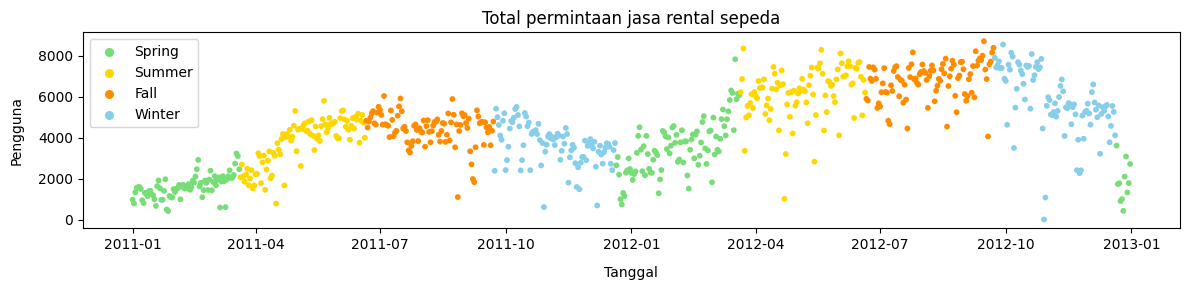

In [497]:
# Membuat diagram scatter untuk total pengguna
plt.figure(figsize=(12,3))
colors = {
    'Spring': '#77DD77',  
    'Summer': '#FFD700',   
    'Fall':   '#FF8C00',  
    'Winter': '#87CEEB'    
}
plt.scatter(day_df['dteday'], day_df['cnt'], c=day_df['musim'].map(colors), s=10)

for seg, color in colors.items():
    plt.scatter([], [], c=color, label=seg, s=30)

plt.title('Total permintaan jasa rental sepeda')
plt.ylabel('Pengguna', labelpad=10)
plt.xlabel('Tanggal',labelpad=10)
plt.legend(loc='upper left')
plt.tight_layout()

### Pertanyaan 2:

In [498]:
#Membuat dataframe baru dengan tabel 2D
day_hour_df = ( hour_df .groupby(['hr', 'weekday'])['cnt'] .mean() .unstack() .sort_index() ) 
day_hour_df.index = [f"{h:02d}:00" for h in day_hour_df.index] 

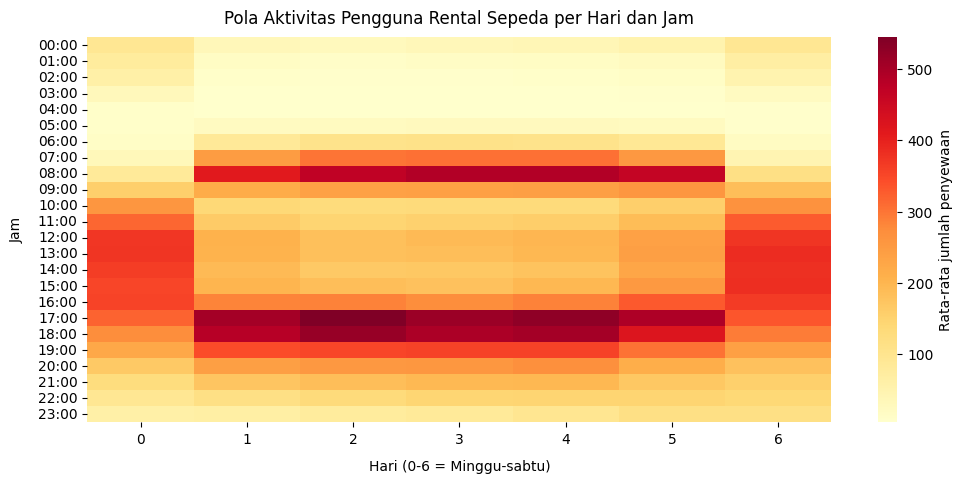

In [499]:
plt.figure(figsize=(12, 5))
sns.heatmap(
    day_hour_df, 
    cmap='YlOrRd', 
    annot=False, 
    cbar_kws={'label': 'Rata-rata jumlah penyewaan','pad':0.05}
)
plt.title('Pola Aktivitas Pengguna Rental Sepeda per Hari dan Jam', pad=10)
plt.ylabel('Jam',labelpad=10)
plt.xlabel('Hari (0-6 = Minggu-sabtu)',labelpad=10)
plt.yticks(rotation=0)
plt.show()

**Insight:**
- Pada diagram scatter total pengguna sepeda harian mengalami kenaikan saat masuk musim summer lalu mengalami penurunan ketika memasuki winter.
- Pada diagram scatter total pengguna harian harian mengalami kenaikan pada tahun 2012 dibandingkan tahun 2011.
- Pola aktivitas pengguna harian tinngi pada pagi jam 8 dan sore sekitar jam 17:00 - 18:00 di hari weekday
- Pola aktivitas pengguna harian cukup tinggi pada jam 10:00 - 18:00 di hari weekend

## Analisis Lanjutan (Opsional)

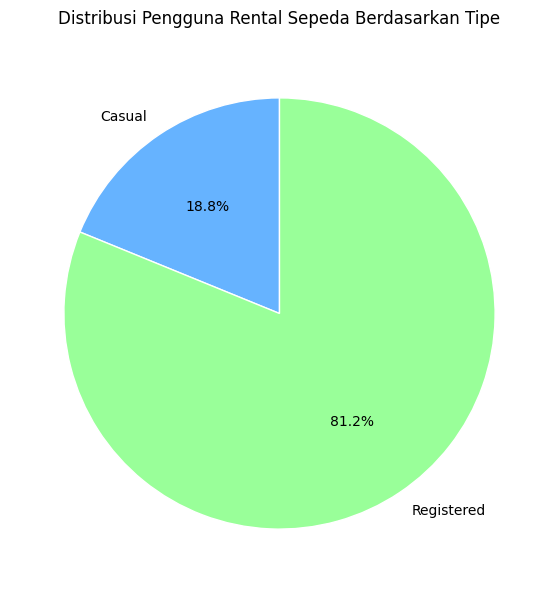

In [500]:
user_types = ['Casual', 'Registered']

fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(
    [day_df['casual'].sum(), day_df['registered'].sum()],
    labels=user_types,
    autopct='%1.1f%%',
    colors=['#66b3ff', '#99ff99'],
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

ax.set_title('Distribusi Pengguna Rental Sepeda Berdasarkan Tipe', pad=15)

plt.show()

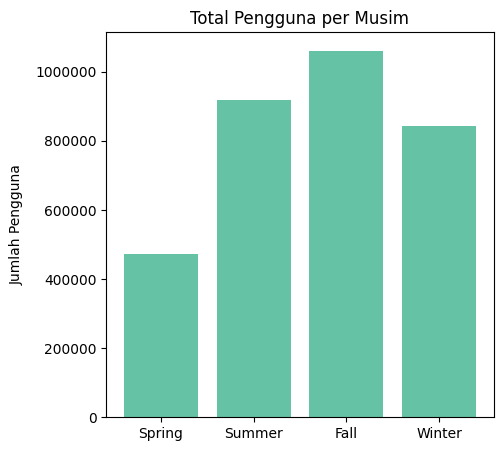

In [501]:
musim = grouped_musim_day_sum.index

plt.figure(figsize=(5, 5))

plt.bar(musim, grouped_musim_day_sum['cnt'], color='#66c2a5')
plt.title('Total Pengguna per Musim')
plt.ylabel('Jumlah Pengguna', labelpad=8)
plt.ticklabel_format(style='plain', axis='y')

Text(0, 0.5, 'Jumlah Pengguna')

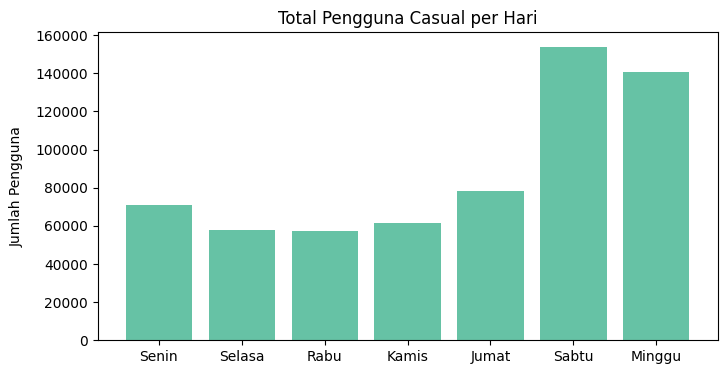

In [502]:
hari = grouped_hari_sum.index

plt.figure(figsize=(8, 4)) 
plt.bar(hari, grouped_hari_sum['casual'], color='#66c2a5')
plt.title('Total Pengguna Casual per Hari')
plt.ylabel('Jumlah Pengguna', labelpad=8)

Text(0, 0.5, 'Jumlah Pengguna')

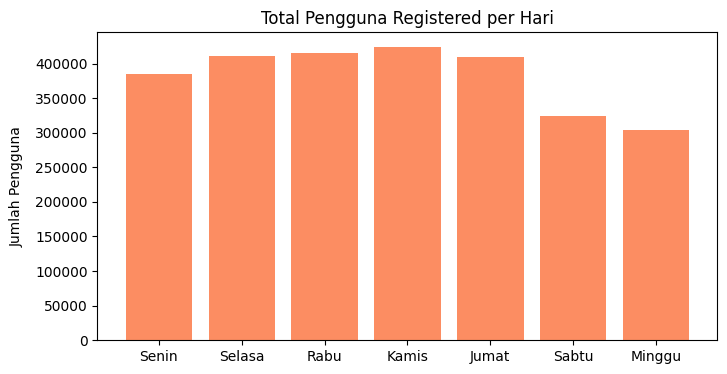

In [503]:
plt.figure(figsize=(8, 4)) 
plt.bar(hari, grouped_hari_sum['registered'], color='#fc8d62')
plt.title('Total Pengguna Registered per Hari')
plt.ylabel('Jumlah Pengguna', labelpad=8)

Text(0.5, 0, 'Hari')

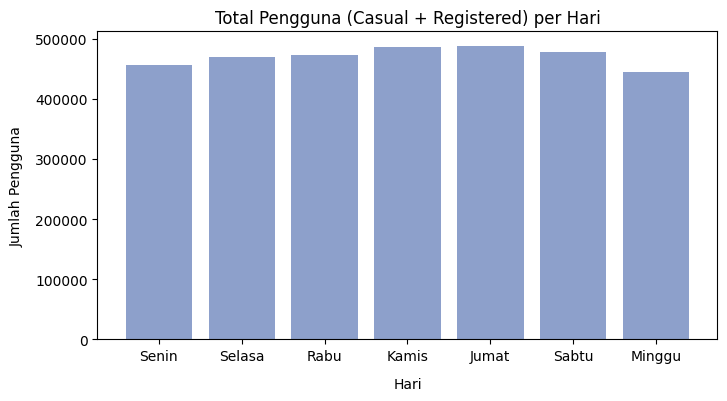

In [504]:
plt.figure(figsize=(8, 4)) 
plt.bar(hari, grouped_hari_sum['cnt'], color='#8da0cb')
plt.title('Total Pengguna (Casual + Registered) per Hari')
plt.ylabel('Jumlah Pengguna', labelpad=8)
plt.xlabel('Hari', labelpad=10)

In [509]:
# Hitung threshold (rata-rata global)
casual_threshold = day_df['casual'].mean()
registered_threshold = day_df['registered'].mean()

# Fungsi untuk menentukan cluster manual
def determine_cluster(row):
    casual = row['casual']
    registered = row['registered']
    is_weekend = row['workingday'] == 0
    
    # Prioritas cluster berdasarkan registered lebih dulu
    if registered > registered_threshold:
        return 'High Registered Users - Weekend' if is_weekend else 'Regular Commuters'
    
    elif casual > casual_threshold:
        return 'High Casual Users - Weekend' if is_weekend else 'Casual Weekday Users'
    
    else:
        return 'Low-Frequency Users'

# Tambahkan kolom cluster
day_df['user_cluster'] = day_df.apply(determine_cluster, axis=1)

# Distribusi cluster
cluster_distribution = day_df['user_cluster'].value_counts()
print("Distribusi Cluster Pengguna:")
print(cluster_distribution)

Distribusi Cluster Pengguna:
user_cluster
Regular Commuters                  300
Low-Frequency Users                269
High Casual Users - Weekend         90
High Registered Users - Weekend     67
Casual Weekday Users                 5
Name: count, dtype: int64


Segmentasi Pengguna:
 - High Registered Users - Weekend: Pengguna terdaftar dengan frekuensi tinggi di weekend
 - Regular Commuters: Pengguna terdaftar yang secara konsisten menggunakan layanan pada weekday
 - High Casual Users - Weekend: Pengguna casual yang aktif di weekend dengan jumlah relatif tinggi
 - Casual Weekday Users: Pengguna casual yang aktif di weekday
 - Low-Frequency Users: Pengguna dengan frekuensi rendah, baik casual maupun registered

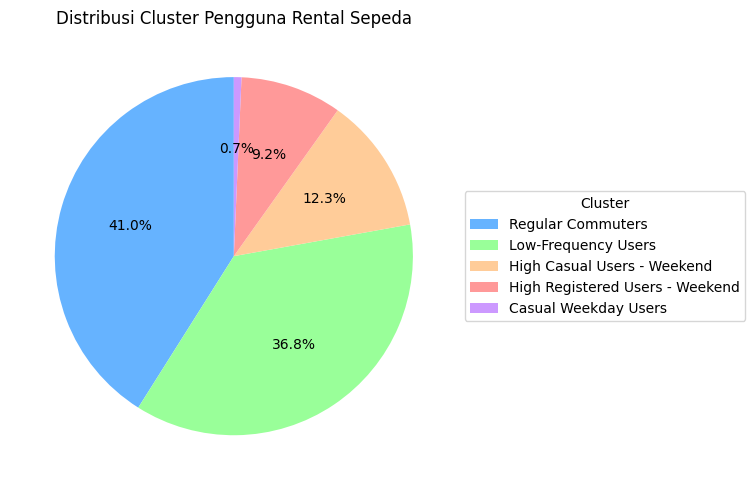

In [516]:
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#cc99ff']

plt.figure(figsize=(10, 5))

# Pie chart tanpa label langsung
wedges, texts, autotexts = plt.pie(
    cluster_distribution,
    labels=None,                 # label dihilangkan dari pie
    autopct='%1.1f%%',           # tampilkan persentase di potongan
    colors=colors[:len(cluster_distribution)],
    startangle=90
)

# Legend di samping pie chart
plt.legend(
    wedges,
    cluster_distribution.index,
    title="Cluster",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Distribusi Cluster Pengguna Rental Sepeda')
plt.tight_layout()
plt.show()

In [517]:
# Analisis karakteristik setiap cluster
cluster_stats = day_df.groupby('user_cluster').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean',
    'workingday': 'mean'
}).round(2)

print("\nKarakteristik Setiap Cluster:")
print(cluster_stats)


Karakteristik Setiap Cluster:
                                  casual  registered      cnt  workingday
user_cluster                                                             
Casual Weekday Users             1093.60     2497.20  3590.80        1.00
High Casual Users - Weekend      1593.58     2836.43  4430.01        0.00
High Registered Users - Weekend  2166.66     4533.96  6700.61        0.00
Low-Frequency Users               315.67     2234.91  2550.58        0.72
Regular Commuters                 803.49     4999.77  5803.26        1.00



**Insight:**

- Aktivitas pengguna weekday didominasi oleh Regular Commuters cocok untuk layanan rutin harian.
- Aktivitas weekend didominasi oleh High Casual atau Registered Users, fokus promosi pada weekend bisa meningkatkan engagement casual users.

## Conclusion

- Conclution pertanyaan 1
    * Terdapat peningkatan yang signifikan dari tahun 2011 ke 2012
    * Pola musiman terlihat jelas dimana permintaan tertinggi pada musim Fall dan terendah pada musim Spring
    * Komposisi pengguna didominasi oleh pengguna registered dibanding casual

- Conclution pertanyaan 2
    - Weekday (Senin-Jumat):
      * Terdapat 2 puncak penggunaan: pagi hari (08:00) dan sore hari (17:00-18:00)
      * Mayoritas pengguna adalah registered users yang menggunakan sepeda untuk commuting
    - Weekend (Sabtu-Minggu):
      * Pola penggunaan lebih merata sepanjang 10:00-18:00
      * Peningkatan signifikan pengguna casual dibandingkan hari kerja


In [508]:
# Menyimpan berkas data ke folder dashboard
hour_df.to_csv("dashboard/hour_df.csv", index=False)
day_df.to_csv("dashboard/day_df.csv", index=False)
day_hour_df.to_csv("dashboard/day_hour_df.csv", index=False)
